In [1]:
import os
import numpy as np
import sys
import os
path = os.path.abspath(".")
print(path)
sys.path.append(path + "\code")
from main import *

C:\Users\François\Music\projet_hub\Open-Food-Fact\notebook


In [2]:
path = ''
all_implement(path)


NearestNeighbors()


In [3]:
dataset = display_data_vector_available()[2]

In [4]:
set_up_model("CNN", "mobile_net")

In [5]:
choice_vector_database("vector_mobile_net.csv")

In [6]:
train_knn("vector_mobile_net.csv")

In [4]:
display_data_vector_available()

['vector.csv',
 'vector_efficient_net.7z',
 'vector_efficient_net.csv',
 'vector_mobile_net.csv',
 'vector_VGG16.csv']

In [ ]:
#train_knn(dataset, verbose=True)
set_up_model("CNN", "efficient_net")
create_database_vectorize(name_database="efficient.csv", verbose=True, size=(456, 456))

Start create new dataset


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


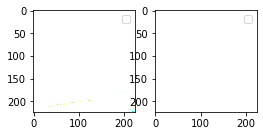

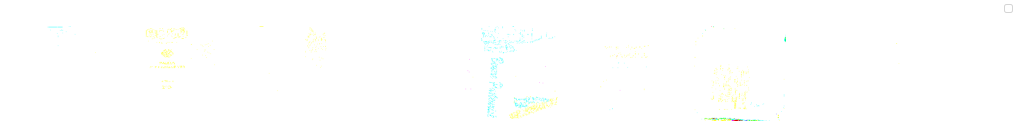

In [25]:
path_dossier_image = "../data/CNN/TEST/20289577.jpg"
show_image(path_dossier_image, 8, size=(224,224))

Start create new dataset
number processed: 0
Execution time: 0.004002809524536133


ValueError: shape mismatch: objects cannot be broadcast to a single shape

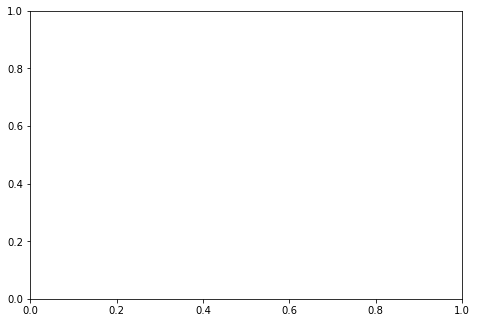

In [9]:
performance_test_cnn(nb_pictures_test=10, verbose=True)

Start create new dataset
number processed: 0
Execution time: 0.0029993057250976562


ValueError: shape mismatch: objects cannot be broadcast to a single shape

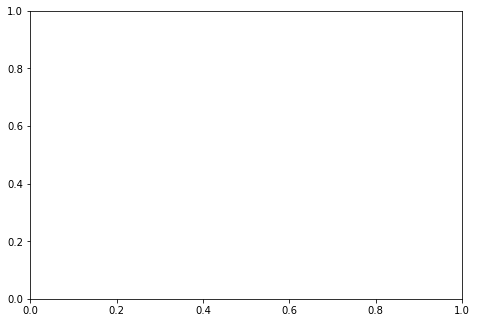

In [13]:
def performance_test_cnn(nb_pictures_test=15, label='product_name',
                         verbose=False):
    """for all then pictures in test, we ll apply knn
        and compt all the occurence where our pictures tested has
        the same name

    Args:
        - nb_picturess_test (int, optional): [description]. Defaults to 5.
        - verbose (bool, optional): [display the different steps
        performed and the calculation time]. Defaults to False.

    """
    if verbose:
        nb_pictures_done = 0
        print("=========================")
        print("Start create new dataset")
        tps1 = time.time()
    test_image = os.listdir(fv.PATH_DATA_CNN_TEST)[:1000]
    list_pictures = [fv.PATH_DATA_CNN_TEST+image for image in test_image]
    test_image = [image.replace('.jpg', '') for image in test_image]
    table_index = dict([(i, 0) for i in range(nb_pictures_test)])
    table_index[-1] = 0
    for path_picture, code_origin_image in zip(list_pictures, test_image):
        if verbose:
            if (nb_pictures_done % 300) == 0:
                tps2 = time.time()
                print(f"number processed: {nb_pictures_done}")
                print(f"Execution time: {tps2 - tps1}")
            nb_pictures_done += 1

        liste_id = picture_to_list_code(path_picture, nb_pictures_test)
        try:
            liste_produits = code_to_name_product(liste_id, label)
        except KeyError as e:
            print(f"code product not found : {e}")
            continue
        name_product = DF_PRODUIT_TEST.loc[code_origin_image, label]
        try:
            table_index[liste_produits.index(name_product)] += 1
        except ValueError:
            table_index[-1] += 1
    x = [i for i in range(1, nb_pictures_test + 1)]
    len_test = len(test_image)
    for i in range(1, nb_pictures_test):
        table_index[i] += table_index[i - 1]
    y = [table_index[i] for i in range(nb_pictures_test)] # / len_test
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.bar(x, y)
    grid_x_ticks = np.arange(0, nb_pictures_test, 0.2)
    grid_y_ticks = np.arange(0, 5, 0.2)
    ax.set_xticks(grid_x_ticks, minor=True)
    ax.set_yticks(grid_y_ticks, minor=True)

    ax.grid(which='both')
    ax.grid(which='minor', alpha=0.2, linestyle='--')
    ax.set_ylabel('percentage')
    ax.set_title('percentage image find by ' + label + 'with '
                 + str(nb_pictures_test))
    plt.bar(x, y)

    
performance_test_cnn(nb_pictures_test=10, verbose=True)

Start create new dataset
number processed: 0
Execution time: 0.003998994827270508
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


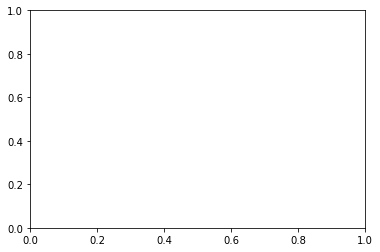

In [32]:
def performance_test_cn(nb_pictures_test=15, label='product_name',
                         verbose=False, size = (224,224)):
    """for all then pictures in test, we ll apply knn
        and compt all the occurence where our pictures tested has
        the same name

    Args:
        - nb_picturess_test (int, optional): [description]. Defaults to 5.
        - verbose (bool, optional): [display the different steps
        performed and the calculation time]. Defaults to False.

    """
    if verbose:
        nb_pictures_done = 0
        print("=========================")
        print("Start create new dataset")
        tps1 = time.time()
    test_image = os.listdir(fv.PATH_DATA_CNN_TEST)[3000:]
    list_pictures = [fv.PATH_DATA_CNN_TEST+image for image in test_image]
    test_image = [image.replace('.jpg', '') for image in test_image]
    table_index = dict([(i, 0) for i in range(nb_pictures_test)])
    table_index[-1] = 0
    for path_picture, code_origin_image in zip(list_pictures, test_image):
        if verbose:
            if (nb_pictures_done % 300) == 0:
                tps2 = time.time()
                print(f"number processed: {nb_pictures_done}")
                print(f"Execution time: {tps2 - tps1}")
            nb_pictures_done += 1

        try: liste_id = picture_to_list_code(path_picture, nb_pictures_test, size)
        except: continue 
        
        try:
            liste_produits = code_to_name_product(liste_id, label)

        except KeyError as e:
            print(f"code product not found : {e}")
            continue
        name_product = DF_PRODUIT_TEST.loc[code_origin_image, label]
        try:
            table_index[liste_produits.index(name_product)] += 1
        except ValueError:
            table_index[-1] += 1
    x = [i for i in range(1, nb_pictures_test + 1)]
    len_test = len(test_image)
    for i in range(1, nb_pictures_test):
        table_index[i] += table_index[i - 1]
    y = [table_index[i] for i in range(nb_pictures_test)]    # /nb_pictures_test
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    
    print(x)
    print(y)
    
    #ax.bar(x, y)
    #grid_x_ticks = np.arange(0, nb_pictures_test, 0.2)
    #grid_y_ticks = np.arange(0, 5, 0.2)
    #ax.set_xticks(grid_x_ticks, minor=True)
    #ax.set_yticks(grid_y_ticks, minor=True)

    #ax.grid(which='both')
    #ax.grid(which='minor', alpha=0.2, linestyle='--')
    #ax.set_ylabel('percentage')
    #ax.set_title('percentage image find by ' + label + 'with '
                 #+ str(nb_pictures_test))
    #plt.bar(x, y)
    
performance_test_cn(nb_pictures_test=10, verbose=True)